<a href="https://colab.research.google.com/github/ThiagoPedrazi/MVPPuc_Sprint2/blob/MVP_PUC_ThiagoPedrazi/MVP_Sprint2A_ThiagoPedrazi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pós Graduação Ciência de Dados - PUC Rio**

## MVP Sprint 2A - Machine Learning
## *Notebook de Classificação para identificação da doença de Mal de Parkinson em pacientes*

### Thiago Pedrazi
### Jul/23

# **1) Problema de Negócio** 💡

Esse Dataset é sobre o histórico de pacientes que tiveram o diagnóstico do Mal de Parkinson positivo ou negativo. Através da dados históricos como peso, altura, idade, histórico de doenças na família, Pressão Sanguínea, entre outros dados, podemos classificar se o paciente tem ou não a doença de Mal de Parkinson.

Do que se trata Mal de Parkinson: é uma doença neurológica que afeta os movimentos da pessoa. Causa tremores, lentidão de movimentos, rigidez muscular, desequilíbrio, além de alterações na fala e na escrita. A Doença de Parkinson ocorre por causa da degeneração das células situadas numa região do cérebro chamada substância negra.

Meu Pai tem essa doença, e isso me motivou a fazer esse projeto.

# **2) Importação das Bibiliotecas** 📚

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# **3) Importação do Dataset** 🎲

In [2]:
# Projeto A - Machine Learning (Classificação)

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/ThiagoPedrazi/MVPPuc_Sprint2/MVP_PUC_ThiagoPedrazi/Parkinsonsdisease.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=';')

# Mostra as primeiras 10 linhas do dataset
dataset.head(10)

# Diagnóstico: 0 é que o Paciente não tem a doença e 1 é que o paciente tem a doença

,diseasehistory,Glucose,BloodPressure,SkinThickness,Insulin,height,Weight,Age,Parkinsonsdisease
0,1,128,10,49,889,178,68,33,0
1,3,96,51,1,373,169,119,79,0
2,6,134,88,41,157,157,105,78,1
3,9,180,100,3,216,167,113,76,0
4,2,159,52,42,238,161,61,36,0
5,8,87,35,32,619,182,113,75,0
6,0,147,84,4,86,171,139,67,0
7,7,165,91,41,363,151,81,77,0
8,7,126,74,16,24,170,80,67,0
9,7,140,69,26,381,186,146,72,0


In [3]:
# Dimensão
dataset.shape

(7594, 9)

# **4) Separação em conjunto de treino e conjunto de teste com holdout**

In [4]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:8]
y = array[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

# **5) Modelagem e Inferência**

## 5.1) Criação e avaliação de modelos: linha base

LR: 0.750782 (0.000650)
KNN: 0.704204 (0.016931)
CART: 0.619089 (0.017439)
NB: 0.750782 (0.000650)
SVM: 0.750782 (0.000650)
Bagging: 0.746831 (0.002162)
RF: 0.748642 (0.003187)
ET: 0.748971 (0.002203)
Ada: 0.750288 (0.001646)
GB: 0.749302 (0.003187)
Voting: 0.750782 (0.000650)


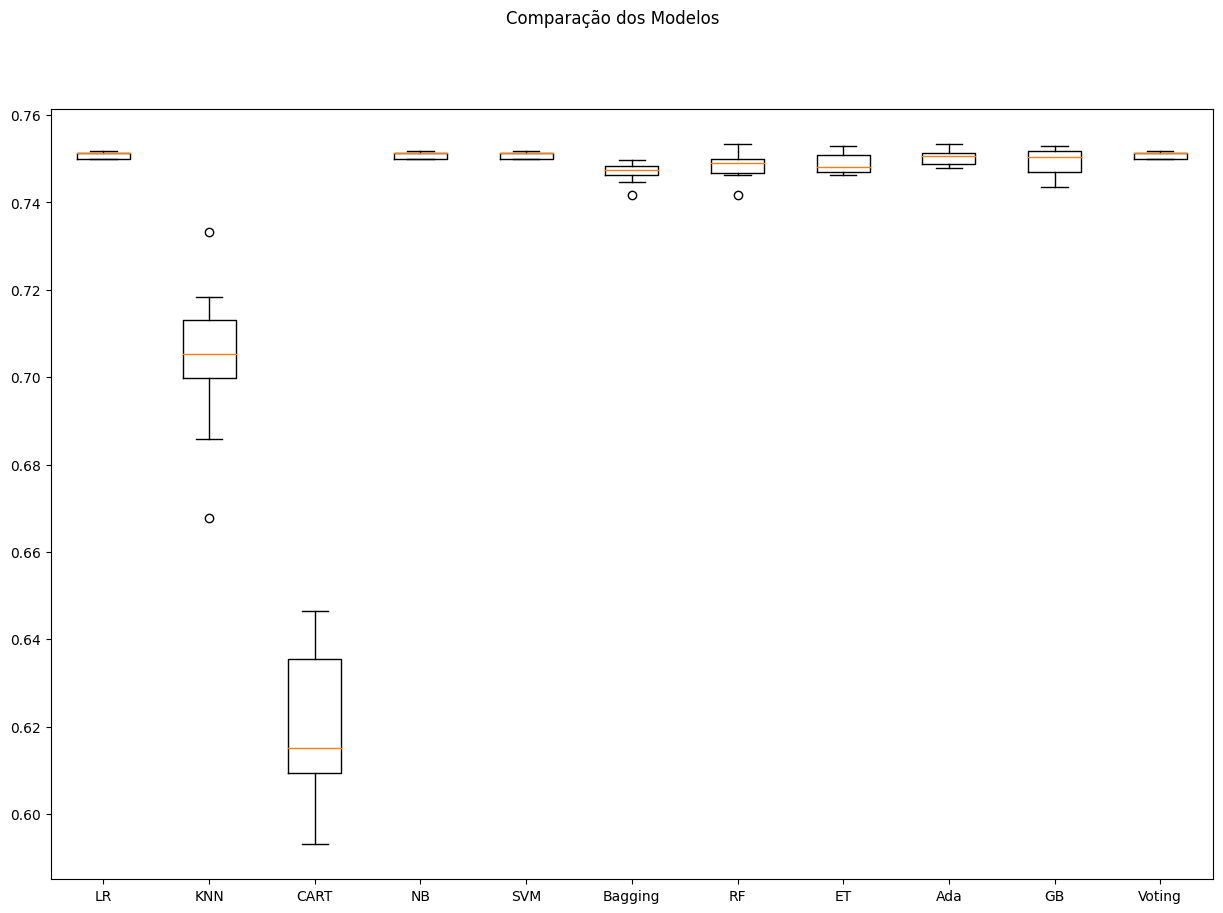

In [5]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 5.2) Criação e avaliação de modelos: dados padronizados e normalizados

LR-orig: 0.751 (0.001)
KNN-orig: 0.704 (0.017)
CART-orig: 0.619 (0.017)
NB-orig: 0.751 (0.001)
SVM-orig: 0.751 (0.001)
Bag-orig: 0.747 (0.002)
RF-orig: 0.749 (0.003)
ET-orig: 0.749 (0.002)
Ada-orig: 0.750 (0.002)
GB-orig: 0.749 (0.003)
Vot-orig: 0.751 (0.001)
LR-padr: 0.751 (0.001)
KNN-padr: 0.691 (0.015)
CART-padr: 0.619 (0.018)
NB-padr: 0.751 (0.001)
SVM-padr: 0.751 (0.001)
Bag-padr: 0.745 (0.005)
RF-padr: 0.749 (0.003)
ET-padr: 0.750 (0.002)
Ada-padr: 0.750 (0.002)
GB-padr: 0.750 (0.003)
Vot-padr: 0.751 (0.001)
LR-norm: 0.751 (0.001)
KNN-norm: 0.693 (0.013)
CART-norm: 0.619 (0.016)
NB-norm: 0.751 (0.001)
SVM-norm: 0.751 (0.001)
Bag-norm: 0.747 (0.005)
RF-norm: 0.748 (0.003)
ET-norm: 0.750 (0.002)
Ada-norm: 0.750 (0.002)
GB-norm: 0.750 (0.003)
Vot-norm: 0.751 (0.001)


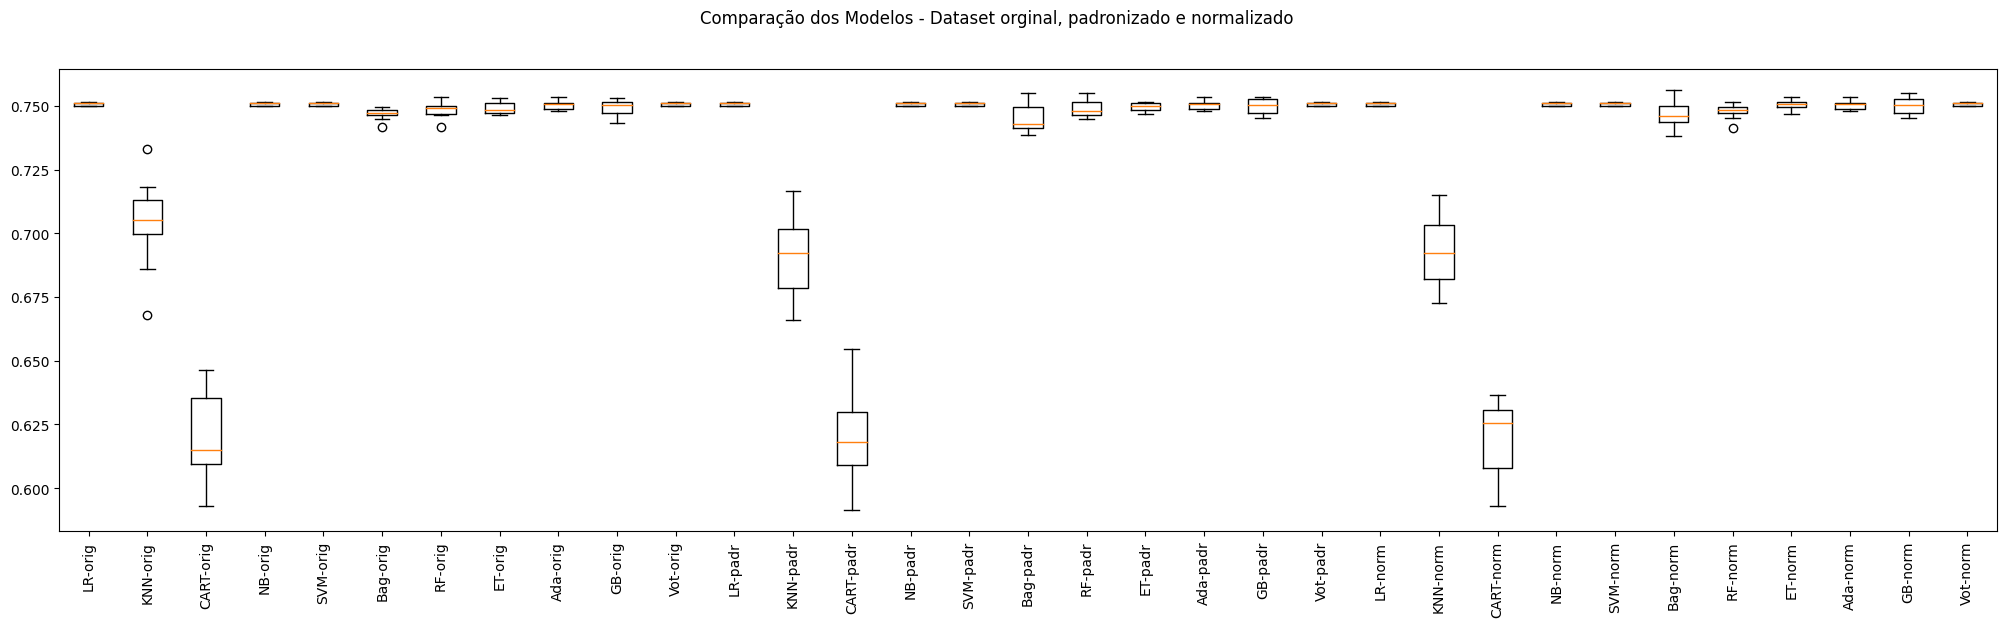

In [6]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

## 5.3) Otimização dos hiperparâmetros

In [7]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.748478 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 21}
Sem tratamento de missings: knn-padr - Melhor: 0.747491 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 21}
Sem tratamento de missings: knn-norm - Melhor: 0.746997 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 21}


# **6) Finalização do Modelo**

In [8]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.7511520737327189


In [10]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

LogisticRegression(max_iter=200)

# **7) Simulando a aplicação do modelo em dados não vistos**

In [19]:
# Novos dados - não sabemos a classe
data = {'diseasehistory':  [1, 9, 5],
        'Glucose': [90, 100, 105],
        'BloodPressure': [50, 60, 75],
        'SkinThickness': [30, 30, 40],
        'Insulin': [100, 233, 544],
        'height': [160, 175, 185],
        'Weight': [65, 81, 90],
        'age': [30, 45, 48],
        }

atributos = ['diseasehistory', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'height', 'Weight', 'age']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:8].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-1.27343263 -1.10454927 -0.0144145   0.35071424 -1.35457742 -0.85965031
  -1.21597396 -1.72487275]
 [ 1.26274555 -0.79340748  0.33286892  0.35071424 -0.84400342  0.40584507
  -0.66650467 -0.70008631]
 [-0.00534354 -0.63783658  0.85379404  1.02859453  0.34989516  1.24950865
  -0.35742819 -0.49512902]]


In [21]:
# Predição de classes dos dados de entrada
# Diagnóstico: 0 é que o Paciente não tem a doença e 1 é que o paciente tem a doença

saidas = model.predict(rescaledEntradaX)
print(saidas)

[0 0 0]


# **8) Considerações Finais**

O algoritmo KNN (K-Nearest Neighbors) é uma técnica de aprendizado de máquina supervisionado usada principalmente para classificação e regressão. A principal razão para usar o algoritmo KNN é sua simplicidade e facilidade de implementação. Algumas das vantagens e razões para utilizar o KNN incluem:

**Simplicidade**: O algoritmo KNN é relativamente fácil de entender e implementar, especialmente quando comparado a algoritmos mais complexos, como redes neurais ou máquinas de suporte vetor (SVM).

**Não paramétrico**: O KNN é um algoritmo não paramétrico, o que significa que não faz suposições específicas sobre a distribuição dos dados. Isso o torna mais flexível em relação a diferentes tipos de conjuntos de dados e permite trabalhar bem com dados não-lineares.

**Não requer treinamento explícito**: O KNN é uma técnica baseada em instância, o que significa que o modelo não precisa ser explicitamente treinado antes do uso. Ele armazena todas as instâncias de treinamento e usa-as diretamente para fazer previsões.

**Versatilidade**: O KNN pode ser aplicado tanto para tarefas de classificação quanto para regressão. Para classificação, a classe da maioria dos vizinhos é atribuída à instância de teste, enquanto para regressão, a média (ou outra medida) dos valores dos vizinhos é usada como a previsão.

**Robustez em dados com ruído**: Devido à sua abordagem de votação por maioria, o KNN é relativamente robusto a ruído nos dados de treinamento, o que pode ser útil quando os dados contêm informações imprecisas.

**Capacidade de lidar com conceitos locais**: O KNN pode ser útil em situações onde os dados são distribuídos localmente em diferentes regiões do espaço, pois ele se adapta a esses padrões.

No entanto, apesar de suas vantagens, o KNN também tem algumas limitações, como a necessidade de armazenar todo o conjunto de treinamento (o que pode ser computacionalmente custoso em grandes conjuntos de dados), a sensibilidade a dados esparsos e o desafio de escolher um valor adequado para o parâmetro 'k' (número de vizinhos). Antes de usar o KNN, é importante avaliar se ele é a escolha certa para o problema específico e se os dados atendem aos pressupostos do algoritmo. Em alguns casos, outros algoritmos de aprendizado de máquina podem fornecer resultados mais precisos ou eficientes.